## *How should I price auto insurance in the United States?*

## Introduction

**Business Context.** The ability to price an insurance quote properly has a significant impact on insurers' management decisions and financial statements. You are the chief data scientist at a new startup insurance company focusing on providing affordable insurance to millennials. You are tasked to assess the current state of insurance companies to see what factors large insurance providers charge premiums for. Fortunately for you, your company has compiled a dataset by surveying what people currently pay for insurance from large companies. Your findings will be used as the basis of developing your company's millenial car insurance offering. 

**Business Problem.** Your task is to build a **minimal** model to predict the cost of insurance from the data set using various characteristics of a policyholder.

**Analytical Context.** The data resides in a CSV file which has been pre-cleaned for you and can directly be read in. Throughout the case, you will be iterating on your initial model many times based on common pitfalls that arise which we discussed in previous cases. You will be using the Python `statsmodels` package to create and analyze these linear models.

In [1]:
### Load relevant packages

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.api         as sm
import statsmodels.formula.api as smf
import os
import sklearn

# This statement allow to display plot without asking to 
%matplotlib inline

# always make it pretty 
plt.style.use('ggplot')

## Diving into the data

In [2]:
df = pd.read_csv('Allstate-cost-cleaned.csv',
    dtype = { # indicate categorical variables
        'A': 'category',
        'B': 'category',
        'C': 'category',
        'D': 'category',
        'E': 'category',
        'F': 'category',
        'G': 'category',
        'car_value': 'category',
        'state': 'category'
    }
)

dff=df.copy()
df_new=df.copy()

The following are the columns in the dataset:

1. **state**: State where shopping point occurred
2. **group_size**: How many people will be covered under the policy (1, 2, 3 or 4) 
3. **homeowner**: Whether the customer owns a home (0=no, 1=yes)
4. **car_age**: Age of the customer's car (How old the car is)
5. **car_value**: Value of the car when it was new
6. **risk_factor**: An ordinal assessment of how risky the customer is (0,1, 2, 3, 4) 
7. **age_oldest**: Age of the oldest person in customer's group
8. **age_youngest**: Age of the youngest person in customer's group
9. **married_couple**: Does the customer group contain a married couple (0=no, 1=yes) 
10. **C_previous**: What the customer formerly had or currently has for product option C (0=nothing, 1, 2, 3,4)
11. **duration_previous**: How long (in years) the customer was covered by their previous issuer
12. **A,B,C,D,E,F,G**: The coverage options:
13. **A**: Collision (levels: 0, 1, 2);
14. **B**: Towing (levels: 0, 1);
15. **C**: Bodily Injury (BI, levels: 1, 2, 3, 4);
16. **D**: Property Damage (PD, levels 1, 2, 3);
17. **E**: Rental Reimbursement (RR, levels: 0, 1);
18. **F**: Comprehensive (Comp, levels: 0, 1, 2, 3);
19. **G**: Medical/Personal Injury Protection (Med/PIP, levels: 1, 2, 3, 4)
20. **cost**: cost of the quoted coverage options 

In [3]:
print(df["state"].head())


0    OK
1    OK
2    PA
3    PA
4    AR
Name: state, dtype: category
Categories (36, object): ['AL', 'AR', 'CO', 'CT', ..., 'WA', 'WI', 'WV', 'WY']


In [4]:
df.head(10)

,Unnamed: 0,state,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,0,OK,1,0,9,f,0.0,24,24,0,3.0,9.0,0,0,1,1,0,0,4,543
1,1,OK,1,0,9,f,0.0,24,24,0,3.0,9.0,2,1,1,3,1,3,2,611
2,2,PA,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,691
3,3,PA,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,695
4,4,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,1,1,0,2,2,628
5,5,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,2,1,0,2,2,625
6,6,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,2,1,0,2,2,628
7,7,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,0,0,1,1,0,0,2,596
8,8,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,2,0,1,1,0,3,2,711
9,9,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,2,0,1,1,0,3,2,722


### Exercise 1:

Write code to visualize the relationship between cost and the following variables. Choose your plots judiciously based on what you know about each variable. Different variable types (categorical vs. numerical) should have different types of plots (e.g. scatter, boxplot, violin plot, etc.) Group your plots together using the `plt.subplot()` function.

1. `car_age`
2. `age_oldest`
3. `age_youngest`
4. `duration_previous`
5. `C_previous`
6. `homeowner`
7. `group_size`
8. `car_age`
9. Categories A-G (7 different plots)

**Answer.**

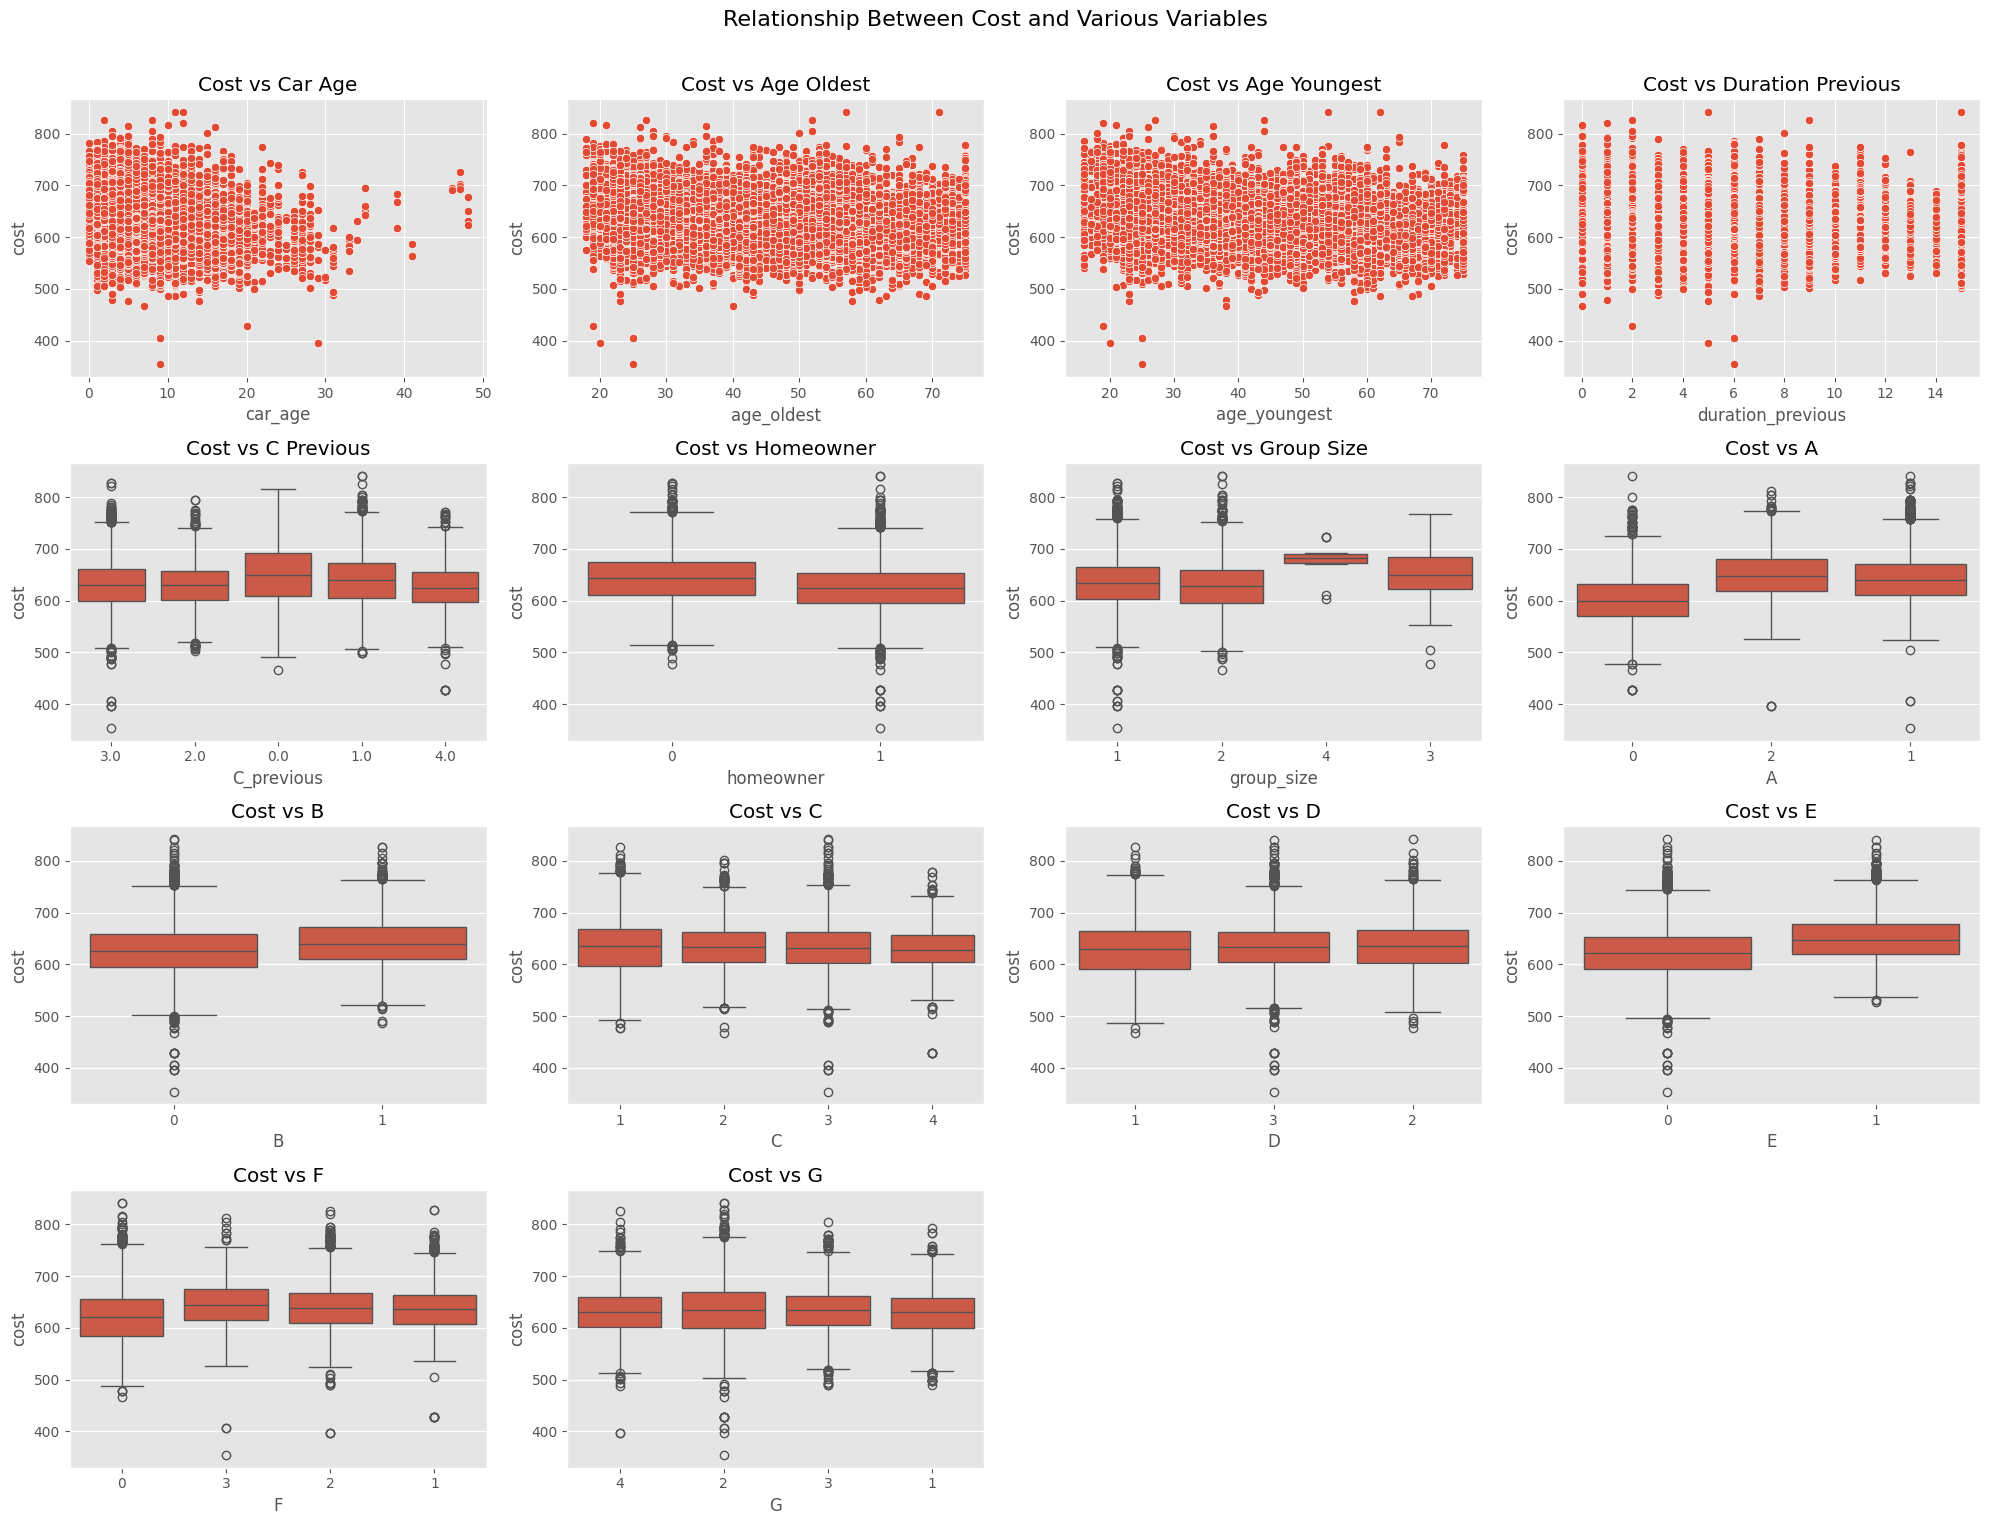

In [5]:
coverage_cols = ["A", "B", "C", "D", "E", "F", "G"]
# Determine required number of subplots
num_plots = 4 + 3 + len(coverage_cols)  # Scatter (4) + Box (3) + Coverage (7) = 14
rows = (num_plots // 4) + (1 if num_plots % 4 else 0)  # Compute rows dynamically

# Set up the figure
fig, axes = plt.subplots(rows, 4, figsize=(20, 16))
fig.suptitle("Relationship Between Cost and Various Variables", fontsize=16)

axes = axes.flatten()  # Flatten the array for easy indexing

# Continuous Variables - Scatter Plots
sns.scatterplot(x=df["car_age"], y=df["cost"], ax=axes[0]).set(title="Cost vs Car Age")
sns.scatterplot(x=df["age_oldest"], y=df["cost"], ax=axes[1]).set(title="Cost vs Age Oldest")
sns.scatterplot(x=df["age_youngest"], y=df["cost"], ax=axes[2]).set(title="Cost vs Age Youngest")
sns.scatterplot(x=df["duration_previous"], y=df["cost"], ax=axes[3]).set(title="Cost vs Duration Previous")

# Categorical Variables - Box Plots
sns.boxplot(x=df["C_previous"].astype(str), y=df["cost"], ax=axes[4]).set(title="Cost vs C Previous")
sns.boxplot(x=df["homeowner"].astype(str), y=df["cost"], ax=axes[5]).set(title="Cost vs Homeowner")
sns.boxplot(x=df["group_size"].astype(str), y=df["cost"], ax=axes[6]).set(title="Cost vs Group Size")

# Coverage Options A-G - Box Plots
for i, col in enumerate(coverage_cols):
    sns.boxplot(x=df[col].astype(str), y=df["cost"], ax=axes[7 + i]).set(title=f"Cost vs {col}")

# Hide any unused subplots
for i in range(num_plots, len(axes)):  
    fig.delaxes(axes[i])  # Remove extra subplots

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()



----------

### Exercise 2:

Convert all categorical data to be in the one-hot encoding format.

**Answer.**

In [6]:
from sklearn.preprocessing import OneHotEncoder

# Identify existing categorical columns
categorical_cols = ["car_value","state", "A", "B", "C", "D", "E", "F", "G"]

ohe=OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")
ohetransform=ohe.fit_transform(df[categorical_cols])
df=pd.concat([df,ohetransform],axis=1).drop(columns=categorical_cols)
print(df.columns)









Index(['Unnamed: 0', 'group_size', 'homeowner', 'car_age', 'risk_factor',
       'age_oldest', 'age_youngest', 'married_couple', 'C_previous',
       'duration_previous', 'cost', 'car_value_a', 'car_value_b',
       'car_value_c', 'car_value_d', 'car_value_e', 'car_value_f',
       'car_value_g', 'car_value_h', 'car_value_i', 'car_value_nan',
       'state_AL', 'state_AR', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_IA', 'state_ID', 'state_IN', 'state_KS',
       'state_KY', 'state_MD', 'state_ME', 'state_MO', 'state_MS', 'state_MT',
       'state_ND', 'state_NE', 'state_NH', 'state_NM', 'state_NV', 'state_NY',
       'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SD',
       'state_TN', 'state_UT', 'state_WA', 'state_WI', 'state_WV', 'state_WY',
       'A_0', 'A_1', 'A_2', 'B_0', 'B_1', 'C_1', 'C_2', 'C_3', 'C_4', 'D_1',
       'D_2', 'D_3', 'E_0', 'E_1', 'F_0', 'F_1', 'F_2', 'F_3', 'G_1', 'G_2',
       'G_3', 'G_4'],
     

----------

## Fitting a multiple linear regression

### Exercise 3:

Split your data into training and testing sets (an 80-20 split is a good starting point).

**Note:** Keep random seed as 1337 in the code cell

**Answer.**

In [7]:
from sklearn.model_selection import train_test_split
X = df.drop(columns="cost")  # Features
y = df["cost"]  # Target

# Perform the 80-20 split with random seed 1337
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [8]:
# # Align columns between X_train and X_test to ensure consistency
X_train, X_test = X_train.align(X_test, join='left', axis=1)

----------

### Exercise 4:

#### 4.1

Fit a multiple linear regression model to the training data regressing cost against all the other variables. Call this `model_all`. What is the AIC value?

**Answer.**

The AIC value is 1.237 x 10^5.


In [9]:
train_data = X_train.copy()
train_data['pay'] = y_train
X_train.columns = X_train.columns.str.replace('.', '_')
X_train.columns = X_train.columns.str.replace('.', '_').str.replace('-','_')


lm1 = 'pay ~ ' + ' + '.join(X_train.columns.difference(['cost']) ) # Ensure no "Unnamed__0"
model_all = smf.ols(formula=lm1, data=train_data).fit()
print(model_all.summary())




                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     139.8
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:47:14   Log-Likelihood:                -61792.
No. Observations:               12386   AIC:                         1.237e+05
Df Residuals:                   12317   BIC:                         1.242e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           194.4965      0.73

----------

#### 4.2 

According to `model_all`, which states are most and least expensive?

**Answer.**

Judging by the coefficients, DC is the most expensive with a coefficient of 45.7 and IA is the least expensive with a coefficient of -45.6


----------

#### 4.3

Interpret the coefficients of `group_size`, `homeowner`, `car_age`, `risk_factor`, `age_oldest`, `age_youngest`       `married_couple` , `duration_previous`. Do the signs and values of these coefficients make sense to you in the context of this business problem?

**Answer.**

You can get values from the table, however just for the sake of the question i wrote a code which made it easier for me to see the numbers instead of looking them up

In [10]:
for col in model_all.params.index:
    if "group_size" in col:
        print(f"{col}: {model_all.params[col]:.4f}")


for col in model_all.params.index:
    if "homeowner" in col:
        print(f"{col}: {model_all.params[col]:.4f}")


column_name = "car_age"  
coefficient = model_all.params[column_name]

for col in model_all.params.index:
    if "risk_factor" in col:
        print(f"{col}: {model_all.params[col]:.4f}")

column_name = "age_oldest"  
coefficient = model_all.params[column_name]

print(f"Coefficient for {column_name}: {coefficient:.4f}")

column_name = "age_youngest" 
coefficient = model_all.params[column_name]

print(f"Coefficient for {column_name}: {coefficient:.4f}")

for col in model_all.params.index:
    if "married_couple" in col:
        print(f"{col}: {model_all.params[col]:.4f}")

column_name = "duration_previous"  
coefficient = model_all.params[column_name]

print(f"Coefficient for {column_name}: {coefficient:.4f}")


group_size: 2.8026
homeowner: -14.0874
risk_factor: -0.7216
Coefficient for age_oldest: 0.5651
Coefficient for age_youngest: -0.9577
married_couple: -9.6801
Coefficient for duration_previous: -1.4855


Group Size (2.8026)
A larger household group size is associated with a higher insurance cost.
This makes sense since more people in a household could mean more insured drivers or higher coverage needs.

Homeowner (-14.0874)
Being a homeowner is linked to a lower insurance cost.
Insurers often offer discounts to homeowners because they are perceived as more financially stable and responsible.

Risk Factor (-0.7216)
A higher risk factor slightly lowers the cost, which is counterintuitive.
Normally, we would expect a higher risk factor to increase premiums. This could indicate issues with how the risk factor is defined in the dataset or interactions with other variables.

Age of Oldest Driver (0.5651)
A higher age of the oldest driver slightly increases the insurance cost.
Older drivers may have higher insurance costs due to potential age-related risks.

Age of Youngest Driver (-0.9577)
A higher age of the youngest driver decreases insurance costs.
This aligns with real-world insurance pricing since younger drivers (e.g., teenagers) typically have higher accident risks and cost more to insure.

Married Couple (-9.6801)
Being a married couple is linked to lower insurance costs.
Insurance companies often provide discounts to married individuals because they are statistically considered safer drivers.

Duration of Previous Policy (-1.4855)
A longer previous policy duration is associated with lower insurance costs.
This could indicate loyalty discounts or that those with longer insurance histories are more stable and less risky customers.

----------

### Exercise 5:

Which variables from `model_all` are statistically significant? (For categorical variables, consider them to be significant if at least one of their categories are statistically significant). Refit the model using only these variables; call this `model_sig`. How does this model compare to the previous model?

**Answer.**

In [11]:
train_data = X_train.copy()
train_data['pay'] = y_train
X_train.columns = X_train.columns.str.replace('.', '_')
X_train.columns = X_train.columns.str.replace('.', '_').str.replace('-','_')


lm1 = 'pay ~ ' + ' + '.join(X_train.columns.difference(['cost', 'group_size' ]) ) # Ensure no "Unnamed__0"
model_sig = smf.ols(formula=lm1, data=train_data).fit()
print(model_sig.summary())


                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:47:14   Log-Likelihood:                -61794.
No. Observations:               12386   AIC:                         1.237e+05
Df Residuals:                   12318   BIC:                         1.242e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           195.2872      0.60

In [12]:
print(f"Adjusted R² (model_all): {model_all.rsquared_adj}")
print(f"Adjusted R² (model_sig): {model_sig.rsquared_adj}")

print(f"AIC (model_all): {model_all.aic}")
print(f"AIC (model_sig): {model_sig.aic}")


Adjusted R² (model_all): 0.4325022806778336
Adjusted R² (model_sig): 0.432383108134491
AIC (model_all): 123721.87206573901
AIC (model_sig): 123723.47837070409


Looking at the adjusted R^2 and the AIC, the model barley differs, given that the numbers are extremley similar with little to no change

### Exercise 6:

In addition to the variables in `model_sig`, add terms for:

1. square of `age_youngest`
2. square term for the age of the car
3. interaction term for `car_value` and `age_youngest`

and save it to a new model `model_sig_plus`.

**Answer.**

In [13]:
car_value_columns = [col for col in train_data.columns if col.startswith('car_value_')]
for col in car_value_columns:
    train_data[f'{col}_age_youngest'] = train_data[col] * train_data['age_youngest']

# Create new features in train_data
train_data['age_youngest_sq'] = train_data['age_youngest'] ** 2
train_data['car_age_sq'] = train_data['car_age'] ** 2

# Update formula to include new terms
lm2 = lm1 + ' + age_youngest_sq + car_age_sq '

# Add interaction terms for encoded car_value categories
lm2 += ' + ' + ' + '.join([f"{col}_age_youngest" for col in car_value_columns])

# Fit the updated model
model_sig_plus = smf.ols(formula=lm2, data=train_data).fit()

# Print summary
print(model_sig_plus.summary())


                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     130.2
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:47:15   Log-Likelihood:                -61608.
No. Observations:               12386   AIC:                         1.234e+05
Df Residuals:                   12307   BIC:                         1.240e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

----------

## Feature selection

To reduce the number of features, it can often be helpful to aggregate the categories; for example, we can create a new variable by assigning each state to a larger region:

In [14]:
state_regions = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')
# should download the above file
state_regions.head()

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific


### Exercise 7:

#### 7.1

Create a new column where a state is replaced with the region it is in according to the above table.

**Answer.**

In [15]:
# Merge the DataFrames
dff = dff.merge(state_regions[['State Code', 'Region']], 
              left_on='state',  # Column in df
              right_on='State Code',  # Column in state_regions
              how='left')

dff.drop(columns=['state', 'State Code'], inplace=True)

dff



,Unnamed: 0,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,A,B,C,D,E,F,G,cost,Region
0,0,1,0,9,f,0.0,24,24,0,3.0,9.0,0,0,1,1,0,0,4,543,South
1,1,1,0,9,f,0.0,24,24,0,3.0,9.0,2,1,1,3,1,3,2,611,South
2,2,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,691,Northeast
3,3,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,695,Northeast
4,4,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,1,1,0,2,2,628,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15478,15478,1,0,2,g,1.0,70,70,0,4.0,9.0,1,0,4,3,1,2,3,643,South
15479,15479,1,0,2,g,1.0,70,70,0,4.0,9.0,1,0,4,3,1,2,3,643,South
15480,15480,1,0,2,g,1.0,70,70,0,4.0,9.0,1,0,4,3,1,2,3,647,South
15481,15481,1,1,0,e,3.0,25,25,0,2.0,6.0,2,0,3,3,0,0,2,642,Northeast


----------

#### 7.2

Fit the model as in `model_sig_plus` but this time use `region` instead of `state`. Call this `model_region`.

**Answer.**

In [16]:
from sklearn.preprocessing import OneHotEncoder

# Identify existing categorical columns
categorical_colss = ["car_value","Region", "A", "B", "C", "D", "E", "F", "G"]

oher=OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop='first').set_output(transform="pandas")
ohetransformm=ohe.fit_transform(dff[categorical_colss])
dff=pd.concat([dff,ohetransformm],axis=1).drop(columns=categorical_colss)
print(dff.columns)


from sklearn.model_selection import train_test_split
Xx = dff.drop(columns="cost")  # Features
yy = dff["cost"]  # Target

# Perform the 80-20 split with random seed 1337
X_train2, X_test2, y_train2, y_test2 = train_test_split(Xx, yy, test_size=0.2, random_state=1337)

train_dataa = X_train2.copy()
train_dataa['pay'] = y_train2

car_value_columnss = [col for col in train_dataa.columns if col.startswith('car_value_')]
for col in car_value_columnss:
    train_dataa[f'{col}_age_youngest'] = train_dataa[col] * train_dataa['age_youngest']

# Create new features in train_data
train_dataa['age_youngest_sq'] = train_dataa['age_youngest'] ** 2
train_dataa['car_age_sq'] = train_dataa['car_age'] ** 2

lm11 = 'pay ~ ' + ' + '.join(X_train2.columns.difference(['cost', 'group_size' ]) ) # Ensure no "Unnamed__0"

# Update formula to include new terms
lm22 = lm11 + ' + age_youngest_sq + car_age_sq '

# Add interaction terms for encoded car_value categories
lm22 += ' + ' + ' + '.join([f"{col}_age_youngest" for col in car_value_columnss])

# Fit the updated model
model_region = smf.ols(formula=lm22, data=train_dataa).fit()

# Print summary
print(model_region.summary())

Index(['Unnamed: 0', 'group_size', 'homeowner', 'car_age', 'risk_factor',
       'age_oldest', 'age_youngest', 'married_couple', 'C_previous',
       'duration_previous', 'cost', 'car_value_a', 'car_value_b',
       'car_value_c', 'car_value_d', 'car_value_e', 'car_value_f',
       'car_value_g', 'car_value_h', 'car_value_i', 'car_value_nan',
       'Region_Midwest', 'Region_Northeast', 'Region_South', 'Region_West',
       'A_0', 'A_1', 'A_2', 'B_0', 'B_1', 'C_1', 'C_2', 'C_3', 'C_4', 'D_1',
       'D_2', 'D_3', 'E_0', 'E_1', 'F_0', 'F_1', 'F_2', 'F_3', 'G_1', 'G_2',
       'G_3', 'G_4'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     164.3
Date:                Sat, 08 Feb 2025   Prob (F-statistic):      

----------

### Exercise 8:

#### 8.1

What should we do next to minimize features?

**Answer.**

----------

#### 8.2

Using a method of your choice, find the numerical feature(s) in `model_region`, except for the three we added in Exercise 6, which exhibit multicollinearity. **Hint:** consider looking at correlations.

**Answer.**

In [17]:
corr_mat  = train_dataa[['car_age', 'age_oldest', 'age_youngest','C_previous','duration_previous']].corr()
corr_mat

,car_age,age_oldest,age_youngest,C_previous,duration_previous
car_age,1.000000,-0.026204,-0.030037,-0.124409,-0.062311
age_oldest,-0.026204,1.000000,0.918154,0.129150,0.275483
age_youngest,-0.030037,0.918154,1.000000,0.117955,0.245886
C_previous,-0.124409,0.129150,0.117955,1.000000,0.257247
duration_previous,-0.062311,0.275483,0.245886,0.257247,1.000000


<Axes: >

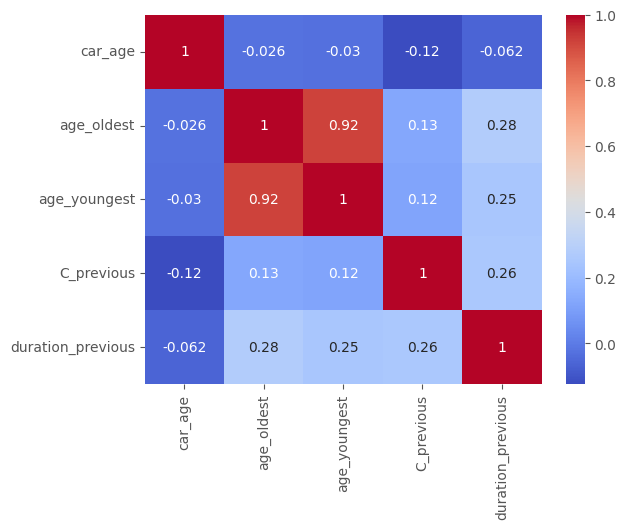

In [18]:
sns.heatmap(corr_mat, annot=True,cmap='coolwarm')

----------

#### 8.3:

Refit `model_region` after dropping these redundant predictor(s); call this `model_region_no_oldest`.

**Answer.**

In [19]:
lm11_nooldst = 'pay ~ ' + ' + '.join(X_train2.columns.difference(['cost', 'group_size','age_oldest' ]) ) # Ensure no "Unnamed__0"

# Update formula to include new terms
lm22_nooldst = lm11_nooldst + ' + age_youngest_sq + car_age_sq '

# Add interaction terms for encoded car_value categories
lm22_nooldst += ' + ' + ' + '.join([f"{col}_age_youngest" for col in car_value_columnss])

# Fit the updated model
model_region_no_oldest = smf.ols(formula=lm22_nooldst, data=train_dataa).fit()

# Print summary
print(model_region_no_oldest.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     164.5
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:47:16   Log-Likelihood:                -62425.
No. Observations:               12386   AIC:                         1.249e+05
Df Residuals:                   12340   BIC:                         1.253e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

----------

#### 8.4

What would you do to diagnose the `model_region_no_oldest` fit? What does this diagnosis suggest to you? (Hint: try plotting the residuals in various ways.)

**Answer.**

The drop in the R^2 value shows no significance contribution on the model. In order to evaluate the model's performance, analyse: Residual Distribution, and Residuals vs Predicted Values. 

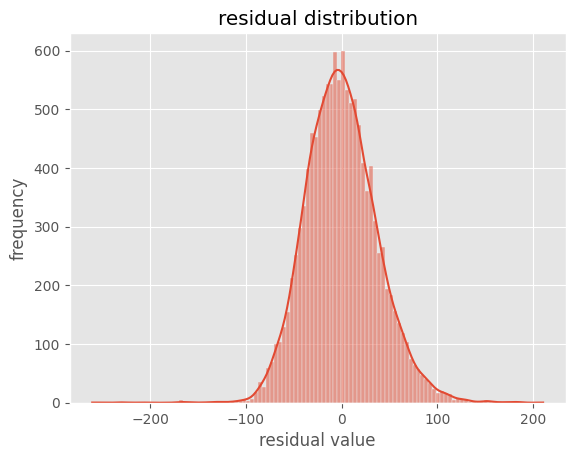

In [20]:
residuals= model_region_no_oldest.resid

sns.histplot(residuals, kde=True)
plt.title("residual distribution")
plt.xlabel("residual value")
plt.ylabel("frequency")
plt.show()

from the above graph we can observe that the residuals follow a normal distribution, meaning that the model's errors are balances and no bias in predictions


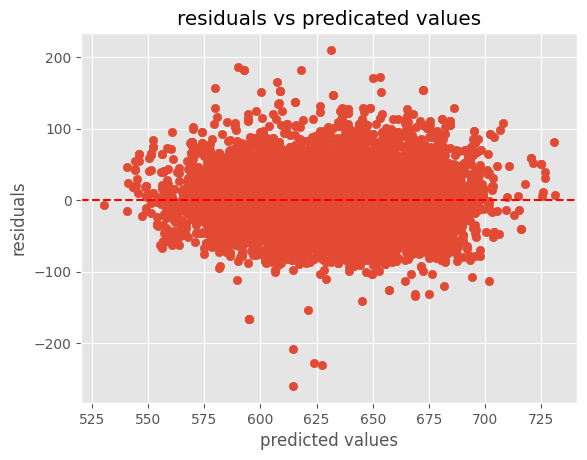

In [21]:
plt.scatter(model_region_no_oldest.fittedvalues, model_region_no_oldest.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("predicted values")
plt.ylabel("residuals")
plt.title("residuals vs predicated values")
plt.show()

looking at the fan shape, this indicates a systematic error. This means that the model's errors are not evenly spread and tend to increase for larger predicated values. 

----------

### Exercise 9:

#### 9.1

Find the best Box-Cox transformation of `cost` used to fit `model_region_no_oldest`. What value do you get?

**Answer.**

In [22]:
from scipy.stats import boxcox
cost_transformed,fitted_lamba=boxcox(train_dataa['pay'])
round(fitted_lamba,2)

# if the number is ~0.5 then use square root 
# if the number is negative then use log
# if the number is ~1/3 then use cubic root

0.49

since number is almost 0.5 we would proceed using square root transformation

----------

#### 9.2

Refit `model_region_no_oldest`, but now with the transformation as suggested by the Box-Cox. Call it `model_region_no_oldest_box_cox`.

**Answer.**

In [23]:
train_dataa['cost_sqrt']=train_dataa['pay'] ** 0.5
lm11_nooldstt = 'pay ~ ' + ' + '.join(X_train2.columns.difference(['cost', 'group_size','age_oldest' ]) ) # Ensure no "Unnamed__0"

# Update formula to include new terms
lm22_nooldstt = lm11_nooldstt + ' + age_youngest_sq + car_age_sq '

# Add interaction terms for encoded car_value categories
lm22_nooldstt += ' + ' + ' + '.join([f"{col}_age_youngest" for col in car_value_columnss])

# Fit the updated model
model_region_no_oldest_box_cox = smf.ols(formula=lm22_nooldstt, data=train_dataa).fit()

# Print summary
print(model_region_no_oldest_box_cox.summary())
# variables= ['car_age', 'age_youngest','C_previous','duration_previous']
# formula_boxcox=f"cost_sqrt~{variables}"
# model_region_no_oldest_box_cox=smf.ols(formula=formula_boxcox, data=train_dataa).fit
# print(model_region_no_oldest_box_cox.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     164.5
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:47:17   Log-Likelihood:                -62425.
No. Observations:               12386   AIC:                         1.249e+05
Df Residuals:                   12340   BIC:                         1.253e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

----------

## Conclusion

In this, you practiced creating linear models using `statsmodels` and iteratively trimming the input variables to go from including all the variables in the dataset to using only the most relevant variables. You excluded those variables that were statistically insignificant and removed those that had high correlation. Finally, we performed some feature engineering in an attempt to remove some tail behavior that deviates from the normal distribution to better fit our linear model. In the end, we had a very minimal model that contained variables that other insurance companies use to charge premiums that gave us insight on how we can better serve a niche population. 